# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *B*

**Names:**

* *Keijiro Tajima*
* *Mahammad Shirinov*
* *Stephen Zhao*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [1]:
import networkx as nx
import csv

G = nx.Graph()

# read the graph from file
with open('../data/network1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if (row[0][0] != '#'):
            G.add_edge(int(row[0]), int(row[1]))

# find number of nodes and edges
n1_edge_count = len(G.edges)
n1_node_count = len(G.nodes)
print ('In Network 1:')
print ('Number of nodes:', n1_node_count)
print ('Number of edges:', n1_edge_count)

In Network 1:
Number of nodes: 13033
Number of edges: 18584


#### Exercise 2.2:  Node degree distribution

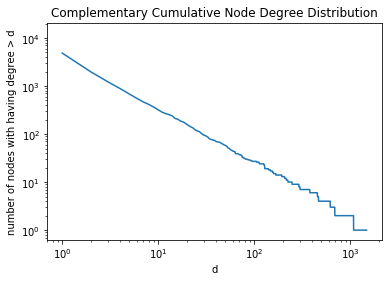

In [2]:
import matplotlib.pyplot as plt
import math

# All degrees in the graph
n1_degrees = sorted([d for n, d in G.degree()])

# Node degree distribution
n1_largest_degree = max(n1_degrees)
n1_degree_distribution = [n1_degrees.count(d) for d in range(0, n1_largest_degree+1)]

# Cumulative node degree distribution
n1_cumulative_degree_distribution = n1_degree_distribution
for d in range(n1_largest_degree):
    n1_cumulative_degree_distribution[d+1] += n1_cumulative_degree_distribution[d]
    
# Complementary cumulative node degree distribution
max_n = max(n1_cumulative_degree_distribution)
n1_complementary_cumulative_degree_distribution = [max_n - n for n in n1_cumulative_degree_distribution]

# Plotting using a log-log plot
plt.title("Complementary Cumulative Node Degree Distribution")
plt.xlabel("d")
plt.ylabel("number of nodes with having degree > d")
plt.loglog(n1_complementary_cumulative_degree_distribution)
plt.show()

##### Properties of the degree distribution?
1. has strong outliers
2. compute the clustering coefficient?

This resemles Pareto Distribution with \gamma ~ -4/3

#### Exercise 2.3: Giant component

In [3]:
connected_components = [G.subgraph(component) for component in nx.connected_components(G)]
largest_component_size = max([len(component) for component in connected_components])

print('Number of connected components:', nx.number_connected_components(G))

if largest_component_size > n1_node_count/2 :
    print('There is a giant component with', largest_component_size, 'nodes.')

Number of connected components: 192
There is a giant component with 12576 nodes.


#### Exercise 2.4: Short paths & Small-worlds

In [4]:
# Compute the lengths of (shortest) paths between every pair of nodes (u, v)
n1_path_lengths = [] 
for a in range(n1_node_count): 
    shortest_paths = nx.shortest_path_length(G,source=a) 
    n1_path_lengths.extend([shortest_paths[b] for b in shortest_paths if b > a])

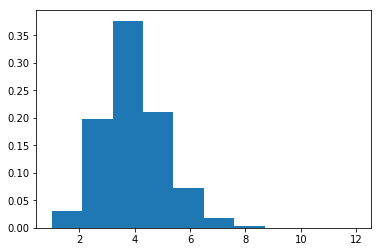

In [10]:
# plot a histogram of degrees
plt.hist(n1_path_lengths, normed=True)
plt.show()

In [12]:
# Mean and Standard Deviation of path lengths
n1_path_lengths_mean = sum(n1_path_lengths)/len(n1_path_lengths)
print('Mean path length between any two nodes is', round(n1_path_lengths_mean, 4))
var = 0 # variance - mean squared error
for x in n1_path_lengths:
    var += (x - n1_path_lengths_mean)**2
var /= len(n1_path_lengths)
sd = math.sqrt(var)
print ('Standard Deviation:', round(sd, 4))

Mean path length between any two nodes is 4.1755
Standard Deviation: 1.0567


So it does look like a small world

In what follows, we compute the average 'growth rate of connectivity' in the graph. The goal is to visualize how many nodes of the network become reachable as we increase the number of hops.
We approximate this in the following way: first, we compute the histogram of all paths based on their length. Then, we make this cumulative, i.e. for a given length $l$, we compute the number of paths having lenght *at most* $l$. Let's call this number $p_l$. Using the formula $\sum{d_u}=2|E|$, which gives the relationship between degrees and number of edges in a graph, and generalizing it to $l$*-degrees* (number of nodes at distance $l$ from a given node $u$) and $E_l$ - number of paths with length $l$, we can say that the number $2*p_l/N$ is the number of nodes within $l$ hops for an average node.

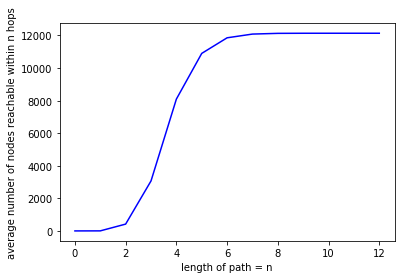

In [22]:
# 'Connectivity Growth'
# for n, find number of paths with length n
n1_sorted_path_lengths = sorted(n1_path_lengths, reverse = True)

# number of paths with length l for every l (basically, a histogram)
accessibiity_distr = [n1_sorted_path_lengths.count(n) for n in range(max(n1_sorted_path_lengths)+1)]

# number of paths with length <=l for every l
for i in range(max(n1_sorted_path_lengths)):
    accessibiity_distr[i+1] += accessibiity_distr[i]

# To get avg number of nodes within n hops, multiply it by 2 and divide by N
accessibiity_distr = list(map(lambda x: x * 2 / n1_node_count, accessibiity_distr))
plt.plot(accessibiity_distr, 'b-')
plt.xlabel('length of path = n')
plt.ylabel('average number of nodes reachable within n hops')
plt.show()

As we can see, the 'connectedness' doesn't increase much for path length > 6. So, indeed, it is a small world.

#### Exercise 2.5: Network comparison

##### Number of nodes and edges

In [24]:
H = nx.Graph()
with open('../data/network2.csv') as csv_file2:
    csv_reader2 = csv.reader(csv_file2, delimiter=',')
    for row in csv_reader2:
        if (row[0][0] != '#'):
            H.add_edge(int(row[0]), int(row[1]))

n2_edge_count = H.edges.__len__()
n2_node_count = H.nodes.__len__()
print ('In Network 2:')
print ('Number of nodes:', n2_node_count)
print ('Number of edges:', n2_edge_count)

In Network 2:
Number of nodes: 26542
Number of edges: 43516


##### Node degree distribution

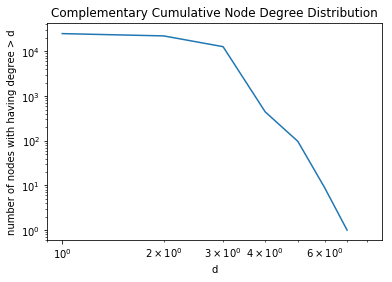

In [25]:
# Degrees
n2_degrees = sorted([d for n, d in H.degree()])

# Node degree distribution
n2_largest_degree = max(n2_degrees)
n2_degree_distribution = [n2_degrees.count(d) for d in range(0, n2_largest_degree+1)]

# Cumulative node degree distribution
n2_cumulative_degree_distribution = n2_degree_distribution
for d in range(n2_largest_degree):
    n2_cumulative_degree_distribution[d+1] += n2_cumulative_degree_distribution[d]
    
n2_max_n = max(n2_cumulative_degree_distribution)
n2_complementary_cumulative_degree_distribution = [n2_max_n - n for n in n2_cumulative_degree_distribution]

# Plotting using a log-log plot
plt.title("Complementary Cumulative Node Degree Distribution")
plt.xlabel("d")
plt.ylabel("number of nodes with having degree > d")
plt.loglog(n2_complementary_cumulative_degree_distribution)
plt.show()

##### Giant component

In [26]:
# CONNECTED COMPONENTS
n2_connected_components = [H.subgraph(c) for c in nx.connected_components(H)]
n2_largest_component_size = max([len(c) for c in n2_connected_components])

print('Number of connected components:', nx.number_connected_components(H))

if n2_largest_component_size > n2_node_count/2 :
    print('There is a giant component with', n2_largest_component_size, 'nodes.')

Number of connected components: 5
There is a giant component with 26481 nodes.


##### Short paths & Small-worlds

In [27]:
# Path Lengths
# List of all length of paths between every pair of nodes (u, v)
n2_path_lengths = [] 
for a in H.nodes: 
    shortest_paths = nx.shortest_path_length(H,source=a) 
    n2_path_lengths.extend([shortest_paths[b] for b in shortest_paths if b > a])

print(len(n2_path_lengths))

350609162


In [28]:
# Mean and Standard Deviation of path lengths
n2_path_lengths_mean = sum(n2_path_lengths)/len(n2_path_lengths)
print('Mean path length between any two nodes is', n2_path_lengths_mean)
n2_var = 0
for x in n2_path_lengths:
    n2_var += (x - n2_path_lengths_mean)**2
n2_var /= len(n2_path_lengths)
n2_sd = math.sqrt(var)
print ('Standard Deviation:', n2_sd)

Mean path length between any two nodes is 97.55689406656178
Standard Deviation: 1.056650969522263


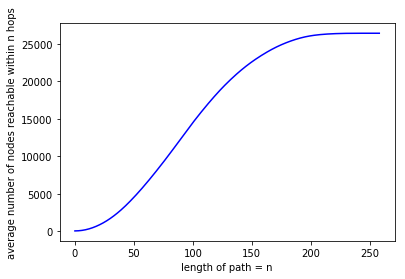

In [30]:
# 'Connectivity Growth'
# for n, find number of paths with length n
n2_sorted_path_lengths = sorted(n2_path_lengths, reverse = True)

# number of paths with length l for every l (basically, a histogram)
n2_accessibiity_distr = [n2_sorted_path_lengths.count(n) for n in range(max(n2_sorted_path_lengths)+1)]

# number of paths with length <=l for every l
for i in range(max(n2_sorted_path_lengths)):
    n2_accessibiity_distr[i+1] += n2_accessibiity_distr[i]

# To get avg number of nodes within n hops, multiply it by 2 and divide by N
n2_accessibiity_distr = list(map(lambda x: x * 2 / n2_node_count, n2_accessibiity_distr))
plt.plot(n2_accessibiity_distr, 'b-')
plt.xlabel('length of path = n')
plt.ylabel('average number of nodes reachable within n hops')
plt.show()

#### Exercise 2.6: Network identification

In [ ]:
# network1 corresponds to a subgraph of routers comprising the Internet. The reason is that it's degree distribution follows power low.
# network2 is the network of roads around the city of New-York. The reason is that the degrees of nodes are very small, at most 8, and almost all of the nodes are connected.